# Setup OpenAI

In [5]:
import getpass
import os

os.environ['OPENAI_API_KEY'] = getpass.getpass("OpenAI API Key: ")

OpenAI API Key:  ········


# Plot images from the data folder

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import os

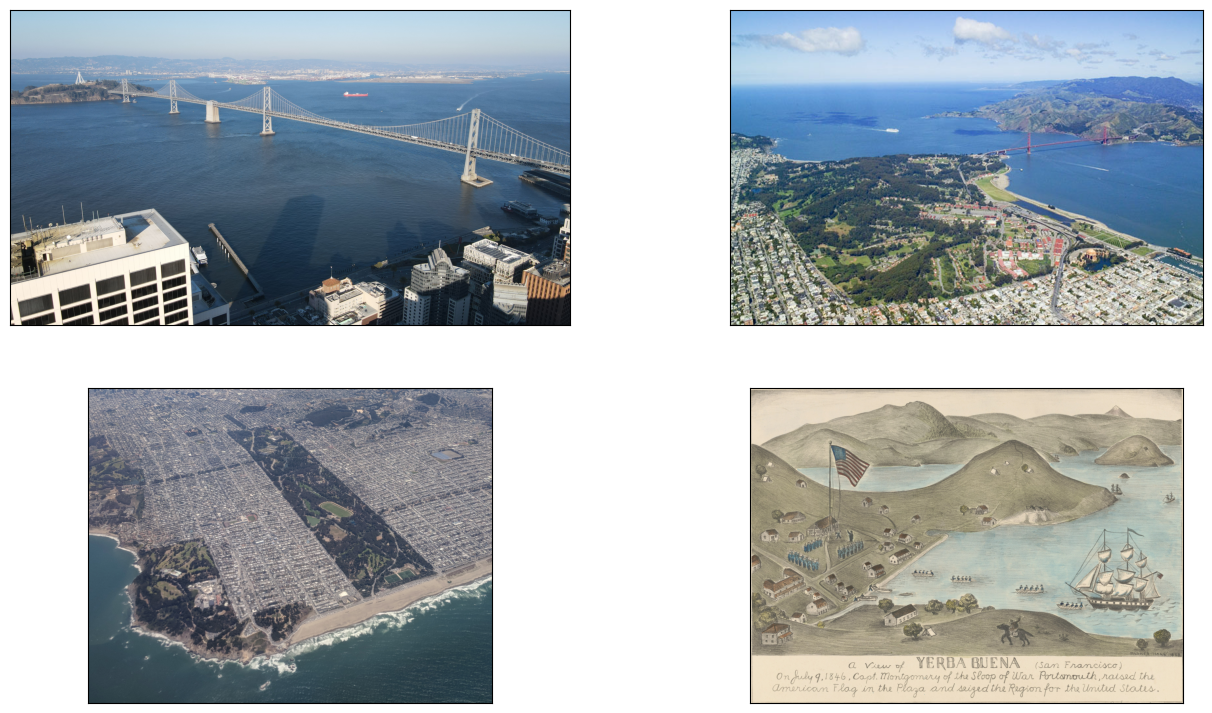

In [3]:
DATA_PATH = "./data/image_reasoning"
image_paths = []
for img_path in os.listdir(DATA_PATH):
    image_paths.append(str(os.path.join(DATA_PATH, img_path)))

def plot_images(image_paths):
    images = 0
    plt.figure(figsize=(16, 9))
    for img_path in image_paths:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 2, images + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images += 1

plot_images(image_paths)

# Reasoning based on these images

In [34]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal
from llama_index.core import SimpleDirectoryReader

# Let's use SimpleDirectoryReader to load image documents
images = SimpleDirectoryReader(DATA_PATH).load_data()

# Create a MultiModal Instance
openai_mm_llm = OpenAIMultiModal(model="gpt-4o")


result = openai_mm_llm.complete(
    prompt="Describe Images",
    image_documents=images)

print(result)

1. The first image is a historical illustration titled "A View of Yerba Buena (San Francisco)." It depicts a scene from July 9, 1846, showing Capt. Montgomery raising the American flag in the plaza. The artwork includes a ship, soldiers, and a small settlement surrounded by hills and water.

2. The second image is an aerial view of San Francisco, showcasing the Golden Gate Bridge spanning the entrance to the San Francisco Bay. The cityscape includes urban areas, green spaces, and the surrounding hills and coastline.

3. The third image is an aerial view of a densely populated urban area in San Francisco. It shows a grid-like pattern of streets, parks, and residential areas along the coastline with waves crashing on the shore.

4. The fourth image features the San Francisco-Oakland Bay Bridge. The view is from a high vantage point, capturing the bridge stretching across the bay with buildings in the foreground and a ship in the water.


In [27]:
response = openai_mm_llm.complete(
    prompt="Which city is it?",
    image_documents=image_documents,
)

print(response)

These images depict San Francisco. The first image is a historical depiction of Yerba Buena, the original name for San Francisco. The others show modern views of the city, including the Golden Gate Bridge and the Bay Bridge.
